In [1]:
#importing packages

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sam16tyagi/Machine-Learning-techniques-in-python/master/logistic%20regression%20dataset-Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data = df.copy() 

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
#plotting discreet data with barplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
data['Purchased'].value_counts()  #--> discreet column data

0    257
1    143
Name: Purchased, dtype: int64

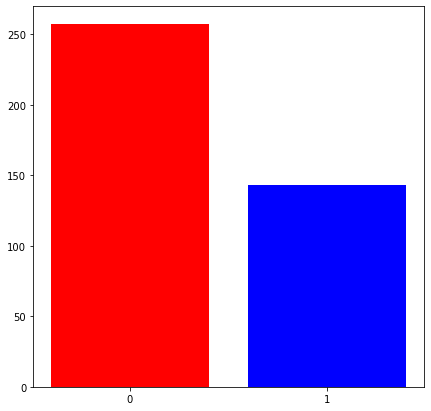

In [12]:
plt.figure(figsize=(7,7))
plt.bar(['0','1'], data['Purchased'].value_counts().values.tolist(), color=['red','blue'])
plt.show()

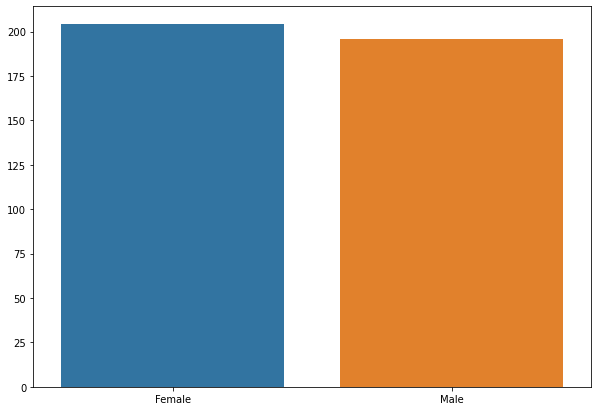

In [13]:
plt.figure(figsize = (10,7))
sns.barplot(x = data['Gender'].value_counts().index.tolist(), y= data['Gender'].value_counts().values.tolist())
plt.show()

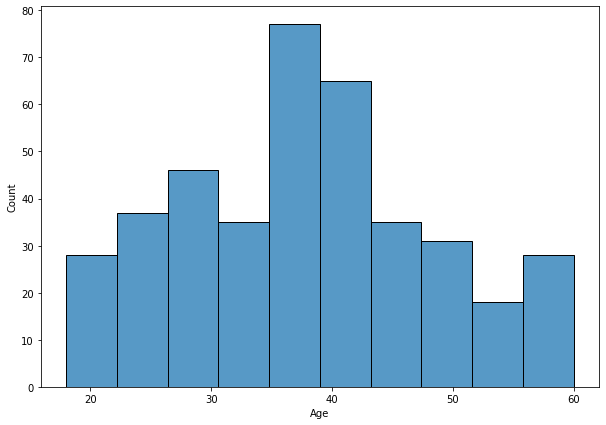

In [14]:
plt.figure(figsize = (10,7))
sns.histplot(data['Age'])
plt.show()

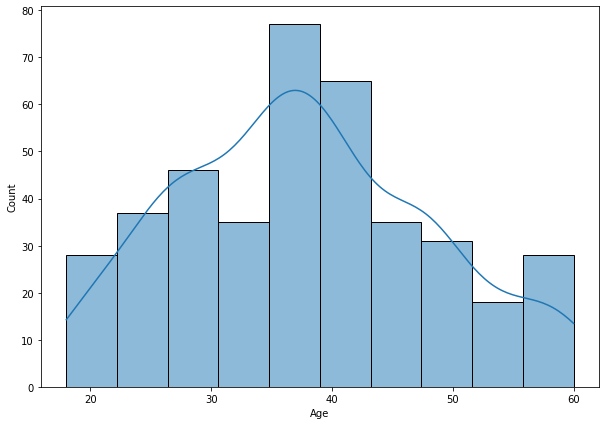

In [15]:
plt.figure(figsize = (10,7))
sns.histplot(data['Age'], kde = True)
plt.show()

In [16]:
data2 = data.drop(['User ID'], axis = 1)


In [17]:
data2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [19]:
df1 = pd.get_dummies(df, drop_first=True)
df1

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [20]:
pd.get_dummies(df1)

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [21]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


<AxesSubplot:xlabel='Age', ylabel='Density'>

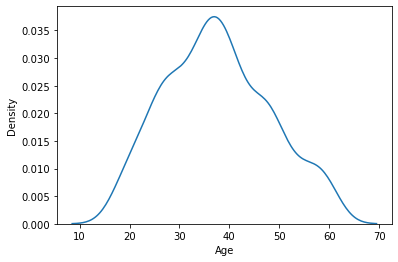

In [22]:
sns.kdeplot(df1['Age'])

<AxesSubplot:xlabel='Age'>

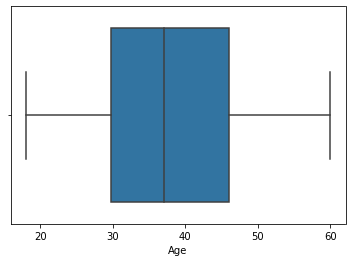

In [23]:
sns.boxplot(df1['Age'])

<AxesSubplot:xlabel='EstimatedSalary'>

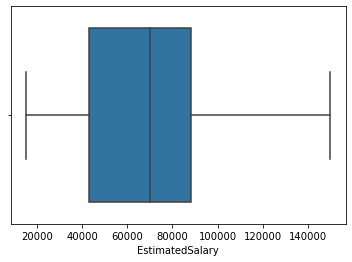

In [24]:
sns.boxplot(df1['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

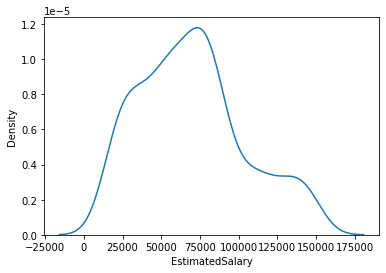

In [25]:
sns.kdeplot(df['EstimatedSalary'])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_data = df1.drop(['Purchased'], axis = 1)
X_data.shape

(400, 4)

In [28]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [29]:
y_data = df1['Purchased']
y_data.shape

(400,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.3) 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
y_test_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
data['Purchased'].value_counts().values/400

array([0.6425, 0.3575])

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
confusion_matrix(y_test, y_test_pred)

array([[71,  5],
       [23, 21]], dtype=int64)

In [39]:
accuracy_score(y_test, y_test_pred)

0.7666666666666667

In [40]:
predictions = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        76
           1       0.81      0.48      0.60        44

    accuracy                           0.77       120
   macro avg       0.78      0.71      0.72       120
weighted avg       0.77      0.77      0.75       120



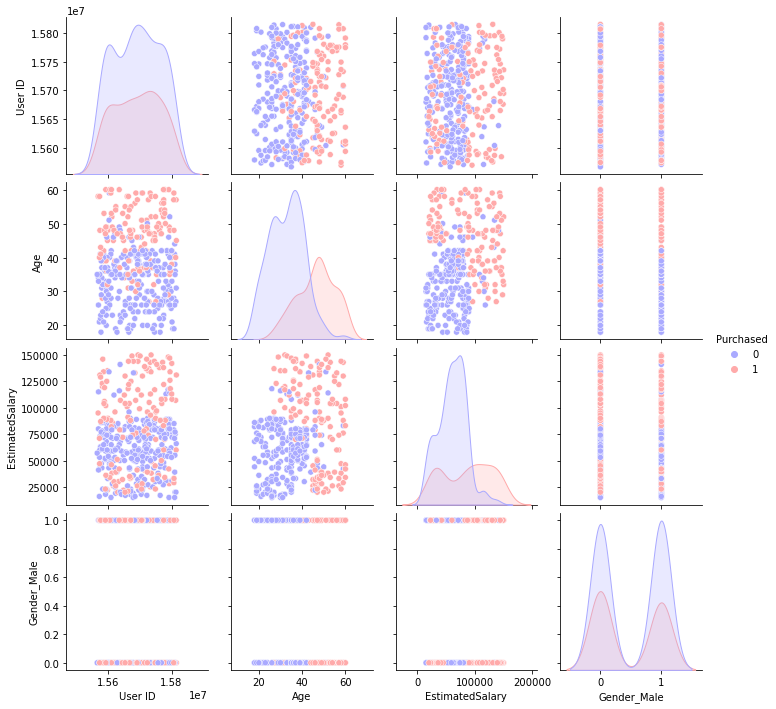

In [43]:
sns.pairplot(df1,hue='Purchased',palette='bwr')

In [44]:
cm=confusion_matrix(y_test, y_test_pred)

In [45]:
import disarray


In [46]:
df = pd.DataFrame(cm, dtype=int)


In [47]:
print(df.da.precision[1])

0.8076923076923077


In [48]:
df.da.TP


0    71
1    21
dtype: int32

In [49]:
df.da.export_metrics(metrics_to_include=['precision', 'recall', 'f1'])

,0,1,micro-average
precision,0.755319,0.807692,0.766667
recall,0.934211,0.477273,0.766667
f1,0.835294,0.600000,0.766667


In [50]:
df.da.sensitivity

0    0.934211
1    0.477273
dtype: float64